# Well Functionality in Tanzania


# Business problem

Access to clean and safe drinking water remains a critical challenge in Tanzania. While many water wells have been installed, many are failing or in need of urgent repair. This has lead to water scarcity, health risks, and inefficient resource allocation for maintenance and repairs.

# Problem Statement
The government of Tanzania lack an efficient system to predict which water wells are likely to fail. The goal is to predict the operating condition of a waterpoint for each record in the dataset.

# Stakeholders

* Government of Tanzania
* NGOs and Internantional Organizations  such as WaterAid or UNICEF can use insights to fund well rehabilitation projects.
* Community water Committes

# Business Objectives
1. Develop a model that accurately predicts the functionality status of a well(functional, needs repair, non-functional)
2. Identify the most important features influencing well functionality.
3. Improve prediction accuracy through data preprocessing techniques for optimal model perfomance.
4. Model optimization by potentially using ensemble methods to enhance ability to predict well functionality.

# Data Understanding

## Load the dataset
Here there's loading of three datasets



In [ ]:
!pip install catboost

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#loading the datasets
training_set_labels = pd.read_csv('Training set labels.csv')

training_set_values = pd.read_csv('Training set values.csv')

test_set_values = pd.read_csv('test set values.csv')


In [ ]:
#diplay the dataset
training_set_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [ ]:
test_set_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


## Data exploration

Here we explore the various details of the different datasets such seeing the shape, missing values and provides a summary of the data using describe() and info() methods.


In [ ]:
test_set_values.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,14850.000000,14850.000000,14850.000000,14850.000000,1.485000e+04,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000
mean,37161.972929,322.826983,655.147609,34.061605,-5.684724e+00,0.415084,15.139057,5.626397,184.114209,1289.708350
std,21359.364833,2510.968644,691.261185,6.593034,2.940803e+00,8.167910,17.191329,9.673842,469.499332,955.241087
min,10.000000,0.000000,-57.000000,0.000000,-1.156459e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18727.000000,0.000000,0.000000,33.069455,-8.443970e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37361.500000,0.000000,344.000000,34.901215,-5.049750e+00,0.000000,12.000000,3.000000,20.000000,1986.000000
75%,55799.750000,25.000000,1308.000000,37.196594,-3.320594e+00,0.000000,17.000000,5.000000,220.000000,2004.000000
max,74249.000000,200000.000000,2777.000000,40.325016,-2.000000e-08,669.000000,99.000000,80.000000,11469.000000,2013.000000


In [ ]:
training_set_values.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [ ]:
training_set_labels.describe()

,id
count,59400.000000
mean,37115.131768
std,21453.128371
min,0.000000
25%,18519.750000
50%,37061.500000
75%,55656.500000
max,74247.000000


In [ ]:
training_set_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [ ]:
training_set_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.3+ KB


In [ ]:
test_set_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13980 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

In [ ]:
#looking for missing values
test_set_values.isnull().sum()

,0
id,0
amount_tsh,0
date_recorded,0
funder,870
gps_height,0
installer,877
longitude,0
latitude,0
wpt_name,0
num_private,0


In [ ]:
training_set_values.isnull().sum()

,0
id,0
amount_tsh,0
date_recorded,0
funder,3637
gps_height,0
installer,3655
longitude,0
latitude,0
wpt_name,2
num_private,0


In [ ]:
training_set_labels.isnull().sum()

,0
id,0
status_group,0


In [ ]:
#merging the two datasets
df_train = pd.merge(training_set_values, training_set_labels, on= 'id')
print(f"Shape of df_train: {df_train.shape}")
display(df_train.head())

Shape of df_train: (59400, 41)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


We then merge the two datasets which are the training_set_values and training_set_labels on the id column to create a combined dataset.(df_train)


## Handling missing values

Here we clean the df_train and test_set_values DataFrames by handling missing values and removing irrelevant columns.

## Cleaning dataset

Here there analysis of the distribution of the various numerical features in the dataframes.

In [ ]:
# Analyze the distribution of numerical features in df_train
print("\nDistribution of numerical features in df_train:")
display(test_set_values.describe())

# Analyze the distribution of categorical features in df_train
print("\nDistribution of categorical features in df_train:")
categorical_cols = test_set_values.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\nDistribution of '{col}':")
    print(test_set_values[col].value_counts())


Distribution of numerical features in df_train:


,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,14850.000000,14850.000000,14850.000000,14850.000000,1.485000e+04,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000
mean,37161.972929,322.826983,655.147609,34.061605,-5.684724e+00,0.415084,15.139057,5.626397,184.114209,1289.708350
std,21359.364833,2510.968644,691.261185,6.593034,2.940803e+00,8.167910,17.191329,9.673842,469.499332,955.241087
min,10.000000,0.000000,-57.000000,0.000000,-1.156459e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18727.000000,0.000000,0.000000,33.069455,-8.443970e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37361.500000,0.000000,344.000000,34.901215,-5.049750e+00,0.000000,12.000000,3.000000,20.000000,1986.000000
75%,55799.750000,25.000000,1308.000000,37.196594,-3.320594e+00,0.000000,17.000000,5.000000,220.000000,2004.000000
max,74249.000000,200000.000000,2777.000000,40.325016,-2.000000e-08,669.000000,99.000000,80.000000,11469.000000,2013.000000



Distribution of categorical features in df_train:

Distribution of 'date_recorded':
date_recorded
2013-02-03    138
2011-03-16    137
2011-03-17    137
2011-03-18    130
2011-03-14    129
             ... 
2011-09-24      1
2004-01-04      1
2013-01-06      1
2011-09-02      1
2004-01-09      1
Name: count, Length: 331, dtype: int64

Distribution of 'funder':
funder
Government Of Tanzania    2215
Danida                     793
Hesawa                     580
World Bank                 352
Kkkt                       336
                          ... 
Craelius                     1
Tanroad                      1
Ndanda Missions              1
Wards                        1
Livin                        1
Name: count, Length: 979, dtype: int64

Distribution of 'installer':
installer
DWE           4349
Government     457
RWE            292
Commu          287
DANIDA         255
              ... 
Commun           1
QUIKWIN          1
SDG              1
MoWI             1
LIVI             1
N

In [ ]:
train_data = df_train.copy()
test_data = test_set_values.copy()

In [ ]:
train_data.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [ ]:
#check for duplicates

def check_duplicates(df):
    """Checks for duplicate rows in the dataset and prints the count."""
    duplicate_count = df.duplicated().sum()
    print(f"Number of duplicate rows: {duplicate_count}")

    return  duplicate_count

# verify results
duplicates = check_duplicates(train_data)
duplicate = check_duplicates(test_data)


Number of duplicate rows: 0
Number of duplicate rows: 0


In [ ]:
train_data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


This function measures the age of each well by converting date_recorded column to a datetime format and subtracting construction_year from recorded_year.

In [ ]:
def clean_data(df):
    """Cleans dataset by dropping redundant columns and handling missing values."""

    # Drop redundant columns
    columns_to_drop = [
        "latitude", "longitude","wpt_name", "region_code", "extraction_type_group", "management_group", "source_group",
        "extraction_type_class", "payment_type", "waterpoint_type_group", "scheme_name", "recorded_by", "year_recorded", "construction_year",
        "subvillage", "date_recorded", "num_private", "amount_tsh", "quantity_group", "subvillage", "scheme_management",
        "source_class", "quality_group", "population", "gps_height", "basin", "source_type", "recorded_by", "lga", "ward", "public_meeting", "permit", "district_code"
    ]
    df = df.drop(columns=columns_to_drop, errors='ignore')


    # Fill missing values for categorical columns with 'unknown'
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].fillna('unknown')

    # Fill missing values for numerical columns with median
    for col in df.select_dtypes(include=['number']).columns:
        df[col] = df[col].fillna(df[col].median())

    return df

# Clean the train and test data
train_data = clean_data(train_data)
test_data = clean_data(test_data)

# Verify the result
train_data.head()

,id,funder,installer,region,extraction_type,management,payment,water_quality,quantity,source,waterpoint_type,status_group
0,69572,Roman,Roman,Iringa,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,functional
1,8776,Grumeti,GRUMETI,Mara,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional
2,34310,Lottery Club,World vision,Manyara,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,functional
3,67743,Unicef,UNICEF,Mtwara,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,non functional
4,19728,Action In A,Artisan,Kagera,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional


In [ ]:
test_data.head()

,id,funder,installer,region,extraction_type,management,payment,water_quality,quantity,source,waterpoint_type
0,50785,Dmdd,DMDD,Manyara,other,parastatal,never pay,soft,seasonal,rainwater harvesting,other
1,51630,Government Of Tanzania,DWE,Arusha,gravity,vwc,never pay,soft,insufficient,spring,communal standpipe
2,17168,unknown,unknown,Singida,other,vwc,never pay,soft,insufficient,rainwater harvesting,other
3,45559,Finn Water,FINN WATER,Lindi,other,vwc,unknown,soft,dry,shallow well,other
4,49871,Bruder,BRUDER,Ruvuma,gravity,water board,pay monthly,soft,enough,spring,communal standpipe


In [ ]:
#Verify the result
train_data.isna().sum()

,0
id,0
funder,0
installer,0
region,0
extraction_type,0
management,0
payment,0
water_quality,0
quantity,0
source,0


In [ ]:
# Create copies for visualization
train_data_viz = df_train.copy()
test_data_viz = test_set_values.copy()


# Combine visualization copies and export for Tableau IMMEDIATELY
cleaned_df_viz = pd.concat([train_data_viz, test_data_viz], ignore_index=True)
cleaned_df_viz['data_source'] = ['train'] * len(train_data_viz) + ['test'] * len(test_data_viz)
cleaned_df_viz.to_csv('cleaned_dataset_viz.csv', index=False)

 Duplicate handling by checking for duplicate rows in the train and test datasets using `check_duplicates` function.


* Handling Zeros and Missing Values
Finally - Data Export for Visualization:
- Creates copies of the original and processed dataframes and combines them for visualization in Tableau.
- Exports the combined dataset as "cleaned_dataset_viz.csv".


## EDA

## Univariate Analysis

## Bar Chart of status_group

This is crucial for seeing the distribution of each well status (functional, needs repair, non-functional). It helps understand class imbalance and if you need to use oversampling or undersampling techniques.

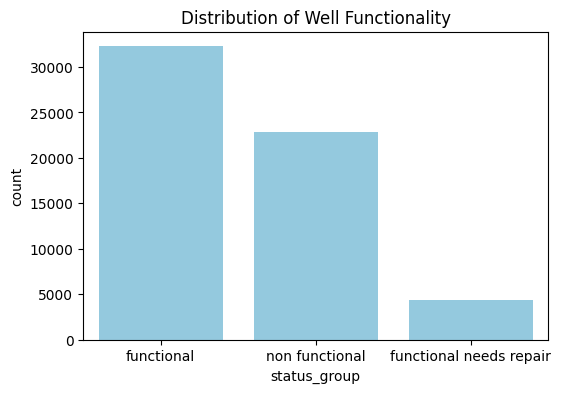

In [ ]:
#Distribution of the status_group
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(x=train_data["status_group"], color="skyblue")
plt.title("Distribution of Well Functionality")
plt.show()

The bar chart displays the distribution of well functionality. There is imbalance in the classes whereby there are far more functional wells than non-functional or repair needed wells.

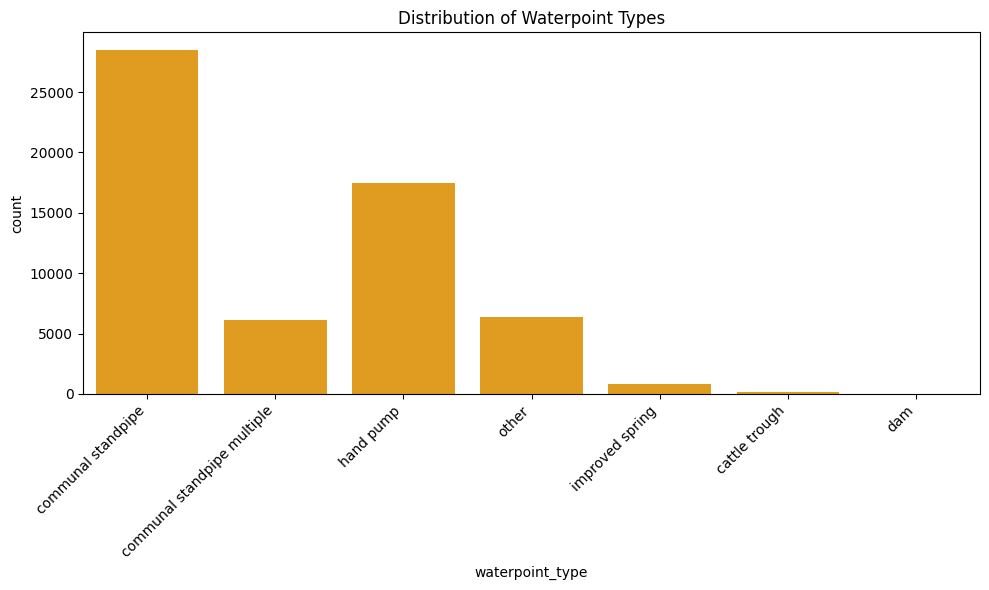

In [ ]:
#plot distribution of waterpoint types
plt.figure(figsize=(10, 6))
sns.countplot(x=train_data['waterpoint_type'], color="orange")
plt.title("Distribution of Waterpoint Types")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

* Communal standpipes are the most common waterpoint type, with the highest count.
* Hand pumps are also widely used but not as common as communal standpipes.
* Other categories, such as improved springs, cattle troughs, and dams, have very few occurrences.


Possible Implications:

Since communal standpipes and hand pumps dominate, they may have a bigger influence on well functionality.
The rare categories (e.g., dams and cattle troughs) may have limited data, which could make it harder for the model to learn patterns for those waterpoints.

## Water Quality Vs Functionality

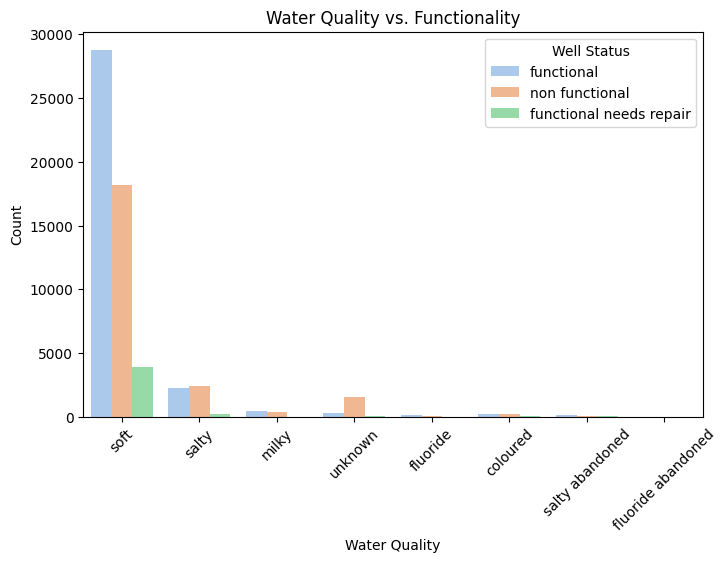

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=train_data['water_quality'], hue=train_data['status_group'], palette='pastel')
plt.title('Water Quality vs. Functionality')
plt.xlabel('Water Quality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title="Well Status")
plt.show()


* Majority of the wells provide soft water, and most of them are functional. This may suggest that soft water sources are more sustainable and require less maintenance.

* Wells with salty water have a higher proportion of non-functional cases. This could indicate that salty water causes more damage to infrastructure.

* Some fluoride, milky and coloured water sources have more non-functioal wells.

Organizations can plan filtration or purification projects for areas with salty or contaminated water to prevent early breakdowns.

## Geographical Distribution of Wells



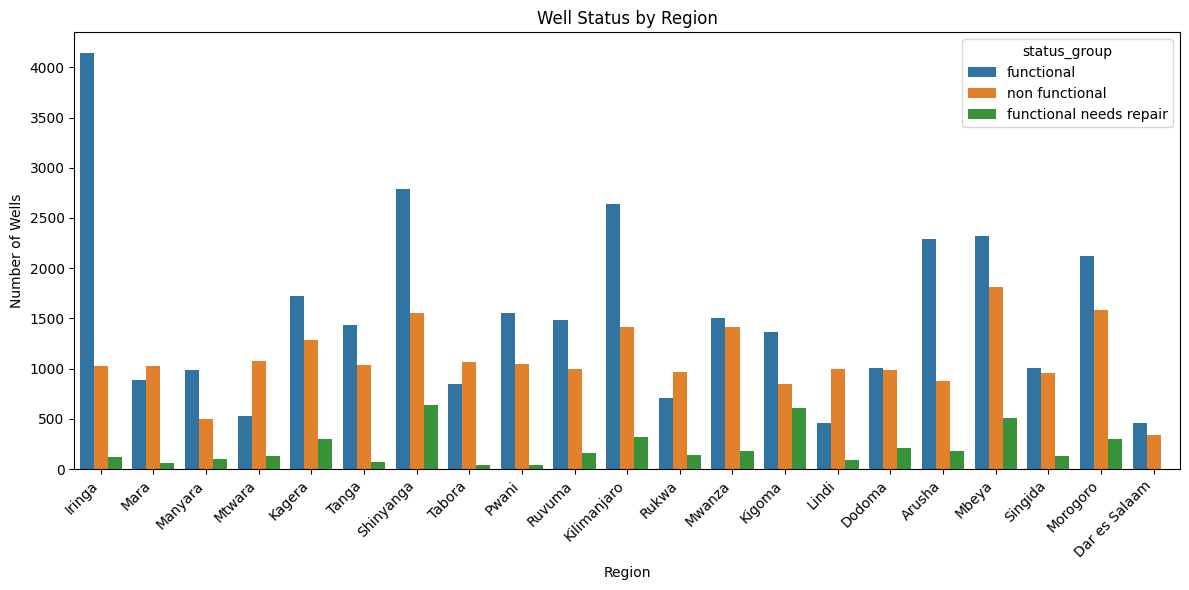

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='region', hue='status_group', data=train_data)
plt.title('Well Status by Region')
plt.xlabel('Region')
plt.ylabel('Number of Wells')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


This visualization shows insights regarding well functionality across different regions in Tanzania.
* Some regions such as Iringa has a high number of functional wells, indicating good maintenance.
* Other regions such as Mtwara and Lindi have fewer functional wells, suggesting possible issues like poor maintenance or lack of funding.
* Some regions such as mbeya , Kilimanjaro have a high number of non-functional wells. This shows areas where the government or NGOs might need to prioritize repairs or new well construction to improve water access.

* Urban regions like Dar es Salaam have fewer wells – This aligns with expectations, as urban areas may rely more on piped water systems rather than wells.

This visualization helps organizations identify the regions that require more resources to improve water access.









## Water quality Vs Management





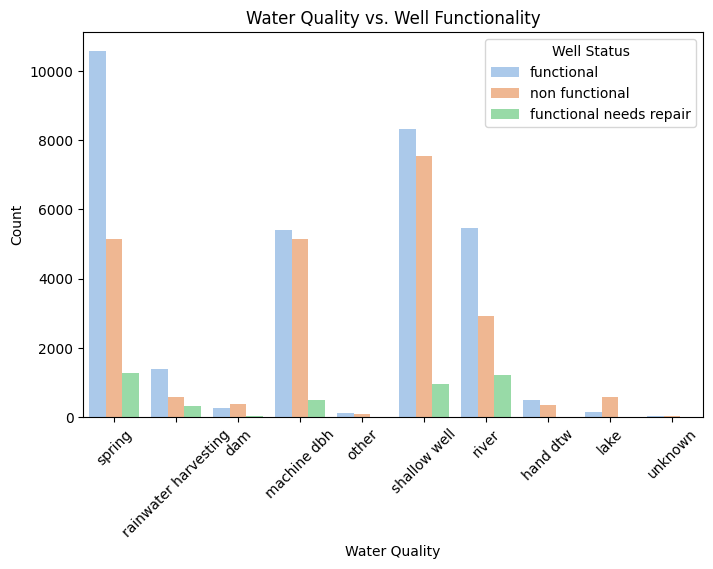

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x=train_data['source'], hue=train_data['status_group'], palette='pastel')
plt.title('Water Quality vs. Well Functionality')
plt.xlabel('Water Quality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title="Well Status")
plt.show()


Focus on High-Impact Sources: Springs and shallow wells, having the highest counts, should be prioritized for maintenance and improvement efforts. Ensuring their functionality can greatly impact water supply reliability.

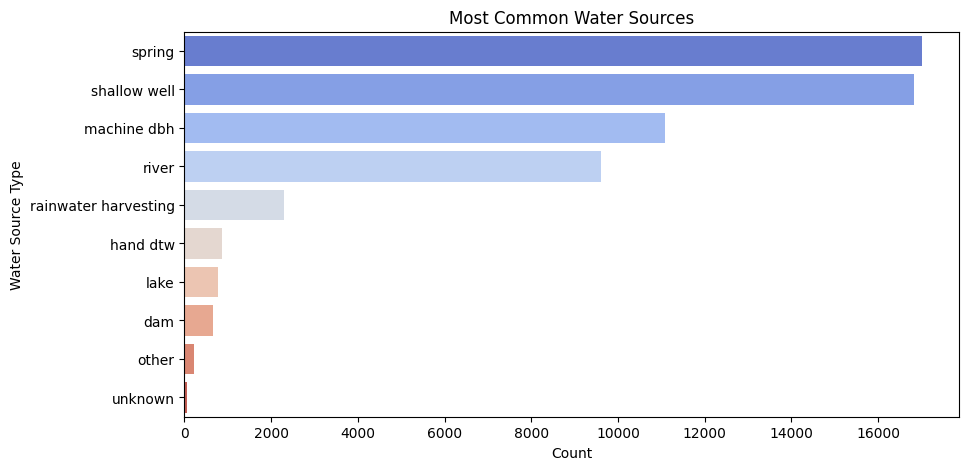

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(y=train_data['source'], order=train_data['source'].value_counts().index, palette='coolwarm')
plt.title('Most Common Water Sources')
plt.xlabel('Count')
plt.ylabel('Water Source Type')
plt.show()


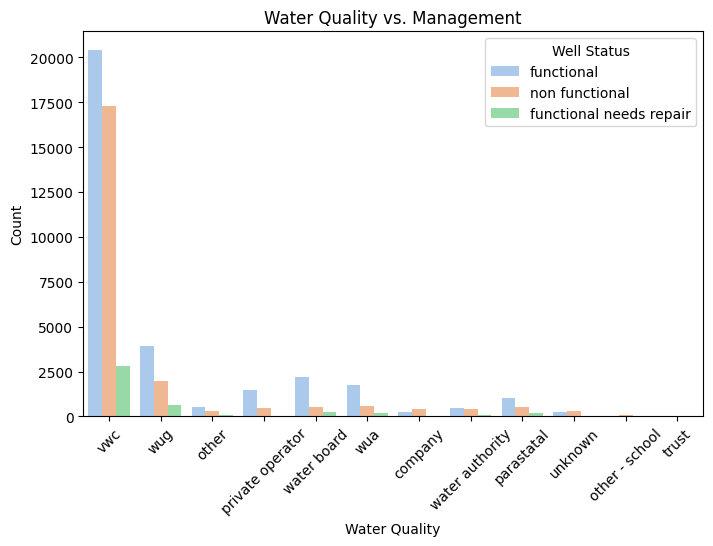

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x=train_data['management'], hue=train_data['status_group'], palette='pastel')
plt.title('Water Quality vs. Management')
plt.xlabel('Water Quality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title="Well Status")
plt.show()


The WWC category has the highest counts for all three well statuses: functional, non-functional, and needs repair.

This indicates that WWC plays a significant role in managing water infrastructure, making it a primary target for maintenance or support initiatives.

Categories like "private operator" and "water authority" have noticeable non-functional wells (orange bars). This highlights areas where targeted intervention could reduce failures.

Overall in our EDA analysis there's various plots such as :

* Well Functionality Distribution:  Significant class imbalance exists, with more functional wells than non-functional or those needing repair.

* **Waterpoint Types:** Communal standpipes are most prevalent, followed by hand pumps.  Less common types may have limited data for accurate model training.

* **Water Quality Impact:** Soft water sources correlate with functional wells, while salty water shows a higher proportion of non-functional wells.  Water quality appears to be a significant factor.

* **Regional Variations:** Functionality varies significantly across regions. Some regions show a higher proportion of functional wells, while others have more non-functional ones, indicating regional disparities in maintenance and resource allocation.

* **Water Source Impact:** Springs and shallow wells are the most common sources.  Their functionality is critical due to their high prevalence.


The visualizations and descriptive statistics provide insights into the data, including class imbalances, the prevalence of different water point types, relationships between water quality and well functionality, and geographical variations in well condition.  This information guides subsequent modeling decisions.


## Data Preprocessing


Preprocesses the training and testing data by selecting relevant columns.

* train_data: pandas DataFrame representing the training data.
* test_data: pandas DataFrame representing the testing data.


In [ ]:
def preprocess_data(train_data, test_data):


    # Keep only relevant columns in training data
    columns_to_keep = ['quantity', 'waterpoint_type',
                       'extraction_type', 'funder', 'installer', 'management', 'water_quality', 'payment', 'status_group']
    train_data = train_data[columns_to_keep]

    # Separate test 'id' before processing
    test_ids = test_data['id']  # Store test IDs separately

    # Keep only necessary features in test_data (excluding 'status_group')
    columns_to_keep_test = [col for col in columns_to_keep if col != 'status_group']
    test_data = test_data[columns_to_keep_test]

    return train_data, test_data, test_ids

# Example usage:
train_data, test_data, test_ids = preprocess_data(train_data, test_data)

Essentially, this function cleans and organizes the data by keeping only the necessary columns and separating the test set identifiers, making the data suitable for model training and prediction.

In [ ]:
def label_encode_data(train_data, test_data):
    """Encodes categorical variables using Label Encoding."""

    # Make copies to avoid modifying the original datasets
    train_data = train_data.copy()
    test_data = test_data.copy()

    # Initialize label encoders
    encoders = {}

    # Define categorical columns to encode
    categorical_cols = ['quantity', 'waterpoint_type', 'extraction_type', 'funder', 'installer',
                        'management', 'water_quality', 'payment']

    for col in categorical_cols:
        encoders[col] = LabelEncoder()

        # Combine unique values from train and test sets
        combined_values = pd.concat([train_data[col], test_data[col]], ignore_index=True).astype(str).unique()
        encoders[col].fit(combined_values)  # Fit encoder

        # Transform and explicitly cast to integer
        train_data[col] = encoders[col].transform(train_data[col].astype(str)).astype(int)
        test_data[col] = encoders[col].transform(test_data[col].astype(str)).astype(int)

    # Encode 'status_group' separately in training data
    le_status = LabelEncoder()
    train_data['status_group'] = le_status.fit_transform(train_data['status_group']).astype(int)

    return train_data, test_data

# Apply the function
train_data, test_data = label_encode_data(train_data, test_data)

# Verify the changes
print(train_data.dtypes)


quantity           int64
waterpoint_type    int64
extraction_type    int64
funder             int64
installer          int64
management         int64
water_quality      int64
payment            int64
status_group       int64
dtype: object


Applied label encoding to specified categorical columns in both training and testing datasets.
* The 'status_group' column in the training dataset is encoded separately, maintaining its order.
* Handles cases where categories in the test set are not present in the training set.


In [ ]:
#verify the result
train_data.head()

,quantity,waterpoint_type,extraction_type,funder,installer,management,water_quality,payment,status_group
0,1,1,3,1547,1706,7,6,2,0
1,2,1,3,522,610,11,6,0,0
2,1,2,3,924,2296,7,6,4,0
3,0,2,14,1960,2078,7,6,0,2
4,3,1,3,20,133,1,6,0,0


In [ ]:
# Identify numerical columns
numerical_cols = train_data.select_dtypes(include=np.number).columns.tolist()

# Remove 'status_group'
if 'status_group' in numerical_cols:
    numerical_cols.remove('status_group')

# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler on the numerical features of the training data
scaler.fit(train_data[numerical_cols])

# Transform both training and test data
train_data[numerical_cols] = scaler.transform(train_data[numerical_cols])
test_data[numerical_cols] = scaler.transform(test_data[numerical_cols])


In [ ]:
train_data.head()

,quantity,waterpoint_type,extraction_type,funder,installer,management,water_quality,payment,status_group
0,0.25,0.166667,0.176471,0.723235,0.708178,0.636364,0.857143,0.333333,0
1,0.50,0.166667,0.176471,0.244039,0.253217,1.000000,0.857143,0.000000,0
2,0.25,0.333333,0.176471,0.431978,0.953093,0.636364,0.857143,0.666667,0
3,0.00,0.333333,0.823529,0.916316,0.862599,0.636364,0.857143,0.000000,2
4,0.75,0.166667,0.176471,0.009350,0.055210,0.090909,0.857143,0.000000,0


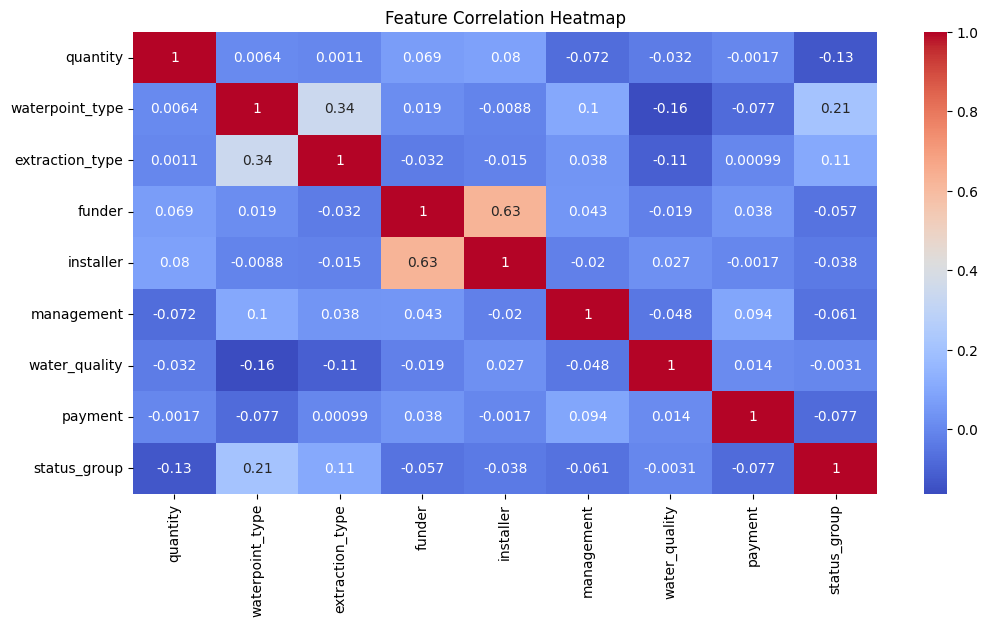

In [ ]:
# Select only numeric columns for correlation calculation
numerical_train_data = train_data.select_dtypes(include=['int', 'float64'])

# Checking Correlations
plt.figure(figsize=(12, 6))
sns.heatmap(numerical_train_data.corr(), cmap="coolwarm", annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
train_data['status_group'].value_counts()

,count
status_group,
0,32259
2,22824
1,4317


Overall in data preprocessing I did the following:

* Encoding Categorical Features: Converting categorical features into numerical representations using Label Encoding to make them suitable for machine learning algorithms.
* **Scaling Numerical Features:** Normalizing numerical features using MinMaxScaler to ensure that features with larger values do not dominate the model and to improve model performance.
* **Feature Selection:** Choosing a subset of the most relevant features for the prediction task. The provided code seems to select features based on domain knowledge or preliminary analysis.

# Feature Engineering

Here we create interaction terms between specified features in the training and testing datasets.



In [ ]:
def create_interaction_terms(train_data, test_data):

    # Interaction term between funder and installer
    train_data['funder_installer'] = train_data['funder'] * train_data['installer']
    test_data['funder_installer'] = test_data['funder'] * test_data['installer']

    # Interaction term between waterpoint type and extraction type
    train_data['waterpoint_extraction'] = train_data['waterpoint_type'] * train_data['extraction_type']
    test_data['waterpoint_extraction'] = test_data['waterpoint_type'] * test_data['extraction_type']

    return train_data, test_data

train_data, test_data = create_interaction_terms(train_data, test_data)

Feature engineering helps to capture relationships between different variables such as between funder and installer which might influence water point reliability.

* Some features combined can improve the model perfomance

In [ ]:
train_data.head()

,quantity,waterpoint_type,extraction_type,funder,installer,management,water_quality,payment,status_group,funder_installer,waterpoint_extraction
0,0.25,0.166667,0.176471,0.723235,0.708178,0.636364,0.857143,0.333333,0,0.512179,0.029412
1,0.50,0.166667,0.176471,0.244039,0.253217,1.000000,0.857143,0.000000,0,0.061795,0.029412
2,0.25,0.333333,0.176471,0.431978,0.953093,0.636364,0.857143,0.666667,0,0.411715,0.058824
3,0.00,0.333333,0.823529,0.916316,0.862599,0.636364,0.857143,0.000000,2,0.790413,0.274510
4,0.75,0.166667,0.176471,0.009350,0.055210,0.090909,0.857143,0.000000,0,0.000516,0.029412


# Modeling

In [ ]:
# Split data into features (X) and target (y)
X = train_data.drop('status_group', axis=1)
y = train_data['status_group']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quantity               59400 non-null  float64
 1   waterpoint_type        59400 non-null  float64
 2   extraction_type        59400 non-null  float64
 3   funder                 59400 non-null  float64
 4   installer              59400 non-null  float64
 5   management             59400 non-null  float64
 6   water_quality          59400 non-null  float64
 7   payment                59400 non-null  float64
 8   funder_installer       59400 non-null  float64
 9   waterpoint_extraction  59400 non-null  float64
dtypes: float64(10)
memory usage: 4.5 MB


In [ ]:
# Baseline Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_val)
print(classification_report(y_val, y_pred_dt))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81      6457
           1       0.43      0.25      0.32       851
           2       0.81      0.70      0.75      4572

    accuracy                           0.76     11880
   macro avg       0.67      0.61      0.63     11880
weighted avg       0.76      0.76      0.75     11880



The model demonstrates good overall perfomance with an accuracy of 75%. This indicates that it correctly classifies 76% of the water points.

* Class 0 (Functional): Achieves the highest precision (0.76), recall (0.88), and F1-score (0.81), suggesting strong performance in identifying functional wells.
* Class 1 (Needs Repair): Shows the lowest performance with a precision of 0.43, recall of 0.25, and F1-score of 0.32. This suggests the model struggles to identify wells needing repair.
* Class 2 (Non-functional): Exhibits relatively good performance with a precision of 0.81, recall of 0.70, and F1-score of 0.75. This suggests the model does a decent job at identifying non-functional wells.


The model performs well in predicting functional and non-functional wells but struggles with wells that need repair. This could be due to class imbalance or needing more distinctive features for that class.

In [ ]:
# List of classifiers to evaluate
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(learning_rate=0.02, n_estimators=1000, max_depth=6, reg_alpha=5),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),

}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    print(f"Training {name}...")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    print(f"Results for {name}:")
    print(classification_report(y_val, y_pred))

Training Random Forest...
Results for Random Forest:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82      6457
           1       0.49      0.24      0.32       851
           2       0.81      0.72      0.76      4572

    accuracy                           0.77     11880
   macro avg       0.69      0.61      0.63     11880
weighted avg       0.76      0.77      0.76     11880

Training XGBoost...
Results for XGBoost:
              precision    recall  f1-score   support

           0       0.74      0.92      0.82      6457
           1       0.67      0.13      0.22       851
           2       0.83      0.66      0.73      4572

    accuracy                           0.76     11880
   macro avg       0.75      0.57      0.59     11880
weighted avg       0.77      0.76      0.74     11880

Training Gradient Boosting...
Results for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.70     

Random Forest:

Overall: Achieves 77% accuracy, showing good overall performance.

Class 0 (Functional): High recall (0.88) and strong F1-score (0.82), meaning the model effectively identifies functional wells.
Class 2 (Non-functional): Performs well with an F1-score of 0.76, indicating a good balance between precision and recall.
Class 1 (Needs Repair): Struggles with a low F1-score of 0.32 and recall of 0.24, meaning it misclassifies many wells that need repairs.
Insights:
Good balance between precision and recall for functional and non-functional wells.
Needs improvement in identifying wells that require repair.

XGBoost:

Overall: Accuracy of 76%, slightly lower than Random Forest.

Class 0 (Functional): Performs well, with an F1-score of 0.82 and high recall (0.92), making it very good at identifying functional wells.
Class 2 (Non-functional): Decent F1-score of 0.73, slightly lower than Random Forest.
Class 1 (Needs Repair): Shows low recall (0.13) and an F1-score of 0.22, meaning many wells that need repairs are misclassified.
Insights:
Might have slightly better precision for non-functional wells compared to Random Forest.
Very low recall for ‘needs repair,’ meaning most wells needing repairs are being misclassified.


Gradient Boosting:

Overall: Accuracy of 74%, the lowest among the three models.

Class 0 (Functional): Performs well with an F1-score of 0.80 and high recall of 0.93.
Class 2 (Non-functional): Moderate performance with an F1-score of 0.69, lower than the other two models.
Class 1 (Needs Repair): Major weakness—F1-score of 0.07 and recall of 0.04, making it almost useless for detecting wells that need repairs.

Insights:
Good precision for functional and non-functional wells.
Extremely poor recall for 'needs repair,' making it the least suitable model if correctly identifying this class is crucial.


## Class Imbalance
Due to the perfomance metrics that show a significant class imbalance,here we balance the dataset by reducing the majority class and increasing the minority classes to create a more even distribution for better model performance.

In [ ]:
# Establish class size (half the size of the majority class)
class_size = train_data['status_group'].value_counts().max() // 2

# Separate classes
df_class_0 = train_data[train_data['status_group'] == 0]
df_class_1 = train_data[train_data['status_group'] == 1]
df_class_2 = train_data[train_data['status_group'] == 2]

# Downsample majority class
df_class_0_downsampled = resample(df_class_0,
                                 replace=False,
                                 n_samples=class_size,
                                 random_state=42)

# Upsample minority classes
df_class_1_upsampled = resample(df_class_1,
                                 replace=True,
                                 n_samples=class_size,
                                 random_state=42)

df_class_2_upsampled = resample(df_class_2,
                                replace=True,
                                n_samples=class_size,
                                random_state=42)

# Combine resampled classes
train_data_balanced = pd.concat([df_class_0_downsampled,
                                 df_class_1_upsampled,
                                 df_class_2_upsampled])

# Shuffle
train_data_balanced = train_data_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the distribution of the target variable
print(train_data_balanced['status_group'].value_counts())

status_group
0    16129
1    16129
2    16129
Name: count, dtype: int64


In [ ]:
# Split the balanced data
X_balanced = train_data_balanced.drop('status_group', axis=1)
y_balanced = train_data_balanced['status_group']
X_train, X_val, y_train, y_val = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = rf_classifier.predict(X_val)
print(classification_report(y_val, y_pred))
print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")

              precision    recall  f1-score   support

           0       0.75      0.68      0.72      3277
           1       0.73      0.86      0.79      3176
           2       0.82      0.75      0.78      3225

    accuracy                           0.76      9678
   macro avg       0.77      0.76      0.76      9678
weighted avg       0.77      0.76      0.76      9678

Accuracy: 0.7631


The balanced dataset is split into training and validation sets, trains a Random Forest model on the training data, uses the model to make predictions on the validation data, and then evaluates the model's performance using metrics like accuracy, precision, recall, and F1-score.

The report provides metrics for each class (0, 1, and 2), which likely represent the well functionality status (e.g., functional, needs repair, non-functional).




Overall Accuracy: 76.3%, indicating a well-performing model.

Class 0 (Functional Wells):

Precision: 0.75 (75% of predicted functional wells are actually functional).
Recall: 0.68 (68% of actual functional wells are correctly identified).
F1-score: 0.72, showing balanced performance but with room for recall improvement.

Class 1 (Needs Repair):

Precision: 0.73 (73% of predicted "needs repair" wells are correctly classified).
Recall: 0.86 (86% of actual "needs repair" wells are identified).
F1-score: 0.79, making it the best-classified category with strong recall.

Class 2 (Non-functional Wells):

Precision: 0.82 (82% of predicted non-functional wells are correct).
Recall: 0.75 (75% of actual non-functional wells are identified).
F1-score: 0.78, showing good balance between precision and recall.

In [ ]:
# Initialize and train the XGBoost model
xgb_model = XGBClassifier(
    learning_rate=0.02,
    n_estimators=1000,
    max_depth=6,
    reg_alpha=5,
    random_state=42
)
xgb_model.fit(X_train, y_train)


# Make predictions on the validation set
y_pred_xgb = xgb_model.predict(X_val)

# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("XGBoost Classifier:")
print(classification_report(y_val, y_pred_xgb))
print(f"Accuracy: {accuracy_score(y_val, y_pred_xgb)}")

# Confusion Matrix
cm_xgb = confusion_matrix(y_val, y_pred_xgb)
print("Confusion Matrix:")
print(cm_xgb)





XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.67      0.66      0.66      3277
           1       0.66      0.76      0.71      3176
           2       0.77      0.67      0.72      3225

    accuracy                           0.70      9678
   macro avg       0.70      0.70      0.70      9678
weighted avg       0.70      0.70      0.70      9678

Accuracy: 0.6958049183715643
Confusion Matrix:
[[2151  758  368]
 [ 491 2427  258]
 [ 573  496 2156]]




Overall Accuracy: 69.6%, slightly lower than the previous model (76.3%).

Class 0 (Functional Wells):

* Precision: 0.67, Recall: 0.66, F1-score: 0.66  Balanced but slightly lower recall.

* Class 1 (Needs Repair):
Precision: 0.66, Recall: 0.76, F1-score: 0.71 Good recall, but precision could improve.

* Class 2 (Non-functional Wells):
Precision: 0.77, Recall: 0.67, F1-score: 0.72 Strong precision but lower recall.


In [ ]:
# Initialize and train the CatBoost model
catboost_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.02,
    depth=6,
    loss_function='MultiClass',
    random_seed=42,
    verbose=100
)

catboost_model.fit(X_train, y_train, eval_set=(X_val, y_val))


# Make predictions on the validation set
y_pred_catboost = catboost_model.predict(X_val)


# Evaluate the model
print("CatBoost Classifier:")
print(classification_report(y_val, y_pred_catboost))
print(f"Accuracy: {accuracy_score(y_val, y_pred_catboost)}")

# Confusion Matrix
cm_catboost = confusion_matrix(y_val, y_pred_catboost)
print("Confusion Matrix:")
cm_catboost


0:	learn: 1.0921587	test: 1.0922336	best: 1.0922336 (0)	total: 98.5ms	remaining: 1m 38s
100:	learn: 0.9040124	test: 0.9070215	best: 0.9070215 (100)	total: 2.02s	remaining: 18s
200:	learn: 0.8559243	test: 0.8623089	best: 0.8623089 (200)	total: 3.97s	remaining: 15.8s
300:	learn: 0.8285913	test: 0.8372964	best: 0.8372964 (300)	total: 7.45s	remaining: 17.3s
400:	learn: 0.8100183	test: 0.8210085	best: 0.8210085 (400)	total: 9.36s	remaining: 14s
500:	learn: 0.7950035	test: 0.8078826	best: 0.8078826 (500)	total: 11.3s	remaining: 11.2s
600:	learn: 0.7816085	test: 0.7963301	best: 0.7963301 (600)	total: 13.2s	remaining: 8.77s
700:	learn: 0.7696734	test: 0.7861756	best: 0.7861756 (700)	total: 15.2s	remaining: 6.46s
800:	learn: 0.7589353	test: 0.7770104	best: 0.7770104 (800)	total: 17.3s	remaining: 4.29s
900:	learn: 0.7495586	test: 0.7692203	best: 0.7692203 (900)	total: 20.5s	remaining: 2.25s
999:	learn: 0.7411245	test: 0.7621624	best: 0.7621624 (999)	total: 22.4s	remaining: 0us

bestTest = 0.7621

array([[2113,  838,  326],
       [ 669, 2234,  273],
       [ 604,  555, 2066]])

verall Performance:
Accuracy: 66.3% → Predicts well functionality correctly for 66% of water points.
Macro Average: F1-score of 0.66, indicating moderate classification performance across all categories.
Class-wise Evaluation:
Class 0 (Functional Wells):

Precision: 0.62, Recall: 0.64 → Struggles slightly to distinguish functional wells from others.
Misclassification: 838 wells misclassified as "Needs Repair", 326 misclassified as "Non-functional".
Class 1 (Needs Repair Wells):

Precision: 0.62, Recall: 0.70 → Decent recall, meaning most wells needing repair are correctly classified.
Misclassification: 669 functional wells classified as needs repair, 273 non-functional wells classified as needs repair.
Class 2 (Non-functional Wells):

Precision: 0.78, Recall: 0.64 → Strong precision, but lower recall, meaning some non-functional wells are misclassified.
Misclassification: 604 functional wells classified as non-functional, 555 needs-repair wells classified as non-functional.
Confusion Matrix Insights:
Struggles to differentiate functional and needs-repair wells, leading to frequent misclassifications.
Non-functional wells have high precision (0.78), meaning fewer false positives, but recall needs improvement.

In [ ]:
# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_knn = knn_classifier.predict(X_val)

# Evaluate the model
print("KNN Classifier:")
print(classification_report(y_val, y_pred_knn))
print(f"Accuracy: {accuracy_score(y_val, y_pred_knn)}")


KNN Classifier:
              precision    recall  f1-score   support

           0       0.66      0.65      0.66      3277
           1       0.67      0.79      0.73      3176
           2       0.78      0.66      0.71      3225

    accuracy                           0.70      9678
   macro avg       0.70      0.70      0.70      9678
weighted avg       0.70      0.70      0.70      9678

Accuracy: 0.6994213680512502


Overall Performance:

Accuracy: 69.9% → The model correctly predicts the well functionality status for about 70% of water points.
Macro Average: F1-score of 0.70, indicating a well-balanced model across all classes.
Class-wise Evaluation:
Class 0 (Functional Wells):

Precision: 0.66, Recall: 0.65 → Performs moderately well in identifying functional wells.
Some misclassification occurs between functional and needs-repair wells.
Class 1 (Needs Repair Wells):

Precision: 0.67, Recall: 0.79 → Strong recall, meaning most wells that need repair are correctly identified.
Higher recall compared to previous models, indicating better sensitivity for this class.
Class 2 (Non-functional Wells):

Precision: 0.78, Recall: 0.66 → High precision but lower recall, meaning the model is good at avoiding false positives but still misses some non-functional wells.
Some non-functional wells are misclassified as functional or needing repair.

In [ ]:
# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_gnb = gnb.predict(X_val)

# Evaluate the model
print("Gaussian Naive Bayes Classifier:")
print(classification_report(y_val, y_pred_gnb))
print(f"Accuracy: {accuracy_score(y_val, y_pred_gnb)}")


Gaussian Naive Bayes Classifier:
              precision    recall  f1-score   support

           0       0.45      0.38      0.41      3277
           1       0.42      0.46      0.44      3176
           2       0.53      0.56      0.54      3225

    accuracy                           0.47      9678
   macro avg       0.46      0.47      0.46      9678
weighted avg       0.46      0.47      0.46      9678

Accuracy: 0.46579871874354206


Overall Performance:

Accuracy: 47% → The model correctly predicts the well functionality status for less than half of the water points.
Macro Average F1-score: 0.46, indicating a weak and imbalanced model across all classes.
Class-wise Evaluation:
Class 0 (Functional Wells):

Precision: 0.45, Recall: 0.38 → Struggles to correctly classify functional wells, often misclassifying them.
Class 1 (Needs Repair Wells):

Precision: 0.42, Recall: 0.46 → Very weak performance, with a high number of misclassifications.
Class 2 (Non-functional Wells):

Precision: 0.53, Recall: 0.56 → Slightly better performance, but still lacks reliability.

# Hyperparameter tuning

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_classifier,
    param_distributions=param_grid,
    n_iter=10,
    scoring='accuracy',
    cv=5,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best model and its predictions
best_xgb_model = random_search.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_val)

# Evaluate the model
print("XGBoost - Best Hyperparameters:", random_search.best_params_)


XGBoost - Best Hyperparameters: {'subsample': 1.0, 'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 0.8}


 Here, the code performs hyperparameter tuning for an XGBoost classifier using randomized search. It explores different combinations of hyperparameters, evaluates their performance using cross-validation, and identifies the best set of hyperparameters that maximizes the model's accuracy on the validation data. This process helps to improve the model's generalization ability and potentially achieve better performance on unseen data.

In [ ]:
# Initialize the XGBoost model with the best hyperparameters
best_xgb_model = XGBClassifier(
    subsample=1.0,
    n_estimators=500,
    max_depth=7,
    learning_rate=0.2,
    colsample_bytree=0.8,
    objective='multi:softmax',
    num_class=3,
    random_state=42
)

# Train the model
best_xgb_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_xgb = best_xgb_model.predict(X_val)

# Evaluate the model
print("XGBoost Classifier with Best Hyperparameters:")
print(classification_report(y_val, y_pred_xgb))
print(f"Accuracy: {accuracy_score(y_val, y_pred_xgb)}")

# Confusion Matrix
cm_xgb = confusion_matrix(y_val, y_pred_xgb)
print("Confusion Matrix:")
print(cm_xgb)

XGBoost Classifier with Best Hyperparameters:
              precision    recall  f1-score   support

           0       0.75      0.68      0.71      3277
           1       0.72      0.86      0.78      3176
           2       0.82      0.73      0.77      3225

    accuracy                           0.76      9678
   macro avg       0.76      0.76      0.76      9678
weighted avg       0.76      0.76      0.76      9678

Accuracy: 0.7583178342632776
Confusion Matrix:
[[2243  631  403]
 [ 320 2726  130]
 [ 440  415 2370]]


Overall Performance:

Achieves an accuracy of 75.83%, showing strong classification ability.
Balanced performance across all classes, with an average F1-score of 0.76 (macro and weighted).

Class-Level:

Class 0 (Functional wells): Precision: 0.75, Recall: 0.68 → Performs well but some functional wells are misclassified as needing repair or non-functional.
Class 1 (Needs Repair): Precision: 0.72, Recall: 0.86 → The model is very good at identifying wells that need repair, with high recall ensuring minimal false negatives.
Class 2 (Non-Functional): Precision: 0.82, Recall: 0.73 → Strong performance, but recall could be improved to capture more truly non-functional wells.

Confusion Matrix Insights:

The model correctly classifies most wells, but some functional wells (631) are misclassified as needing repair.
The ‘Needs Repair’ class is the best classified with high recall (86%), ensuring most problem wells are identified.
Some non-functional wells (415) are misclassified as needing repair, which might affect maintenance planning.

In [ ]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
}

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    estimator=rf_classifier,
    param_distributions=param_grid_rf,
    n_iter=10,
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search_rf.fit(X_train, y_train)

# Get the best model and its predictions
best_rf_model = random_search_rf.best_estimator_

# Evaluate the model
print("Random Forest - Best Hyperparameters:", random_search_rf.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Random Forest - Best Hyperparameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}


In [ ]:
# Initialize the Random Forest model with the best hyperparameters
best_rf_model = RandomForestClassifier(
    n_estimators=500,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=None,
    random_state=42
)

# Train the model
best_rf_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_rf = best_rf_model.predict(X_val)

# Evaluate the model
print("Random Forest Classifier with Best Hyperparameters:")
print(classification_report(y_val, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_val, y_pred_rf)}")

# Confusion Matrix
cm_rf = confusion_matrix(y_val, y_pred_rf)
print("Confusion Matrix:")
print(cm_rf)

Random Forest Classifier with Best Hyperparameters:
              precision    recall  f1-score   support

           0       0.75      0.69      0.72      3277
           1       0.73      0.86      0.79      3176
           2       0.82      0.74      0.78      3225

    accuracy                           0.76      9678
   macro avg       0.77      0.76      0.76      9678
weighted avg       0.77      0.76      0.76      9678

Accuracy: 0.7621409382103741
Confusion Matrix:
[[2257  633  387]
 [ 306 2719  151]
 [ 454  371 2400]]


The Random Forest model achieved an accuracy of 76%, meaning it correctly classified the functionality of 76% of the wells.

Class-wise Performance:

Functional (Class 0): Precision of 0.75 and recall of 0.69 suggest that the model is good at identifying functional wells, but some are misclassified as needing repair or non-functional.
Needs Repair (Class 1): High precision of 0.73 and recall of 0.86 indicate the model's strong ability to correctly identify wells needing repair. This is crucial for prioritizing maintenance efforts.
Non-functional (Class 2): Precision of 0.82 and recall of 0.74 demonstrate good performance in identifying non-functional wells, although there's room for improvement in recall.
Confusion Matrix Insights:

The model shows some confusion between functional and needs repair wells (633 misclassifications) and functional and non-functional wells (387 misclassifications).
It performs best in identifying wells needing repair, with only 151 misclassifications out of 3176 actual cases.

In [ ]:
# make predictions
rf_predictions = best_rf_model.predict(X_val)
xgb_predictions = xgb_model.predict(X_val)
catboost_predictions = catboost_model.predict(X_val)

# verify the shape
print(rf_predictions.shape)
print(xgb_predictions.shape)
print(catboost_predictions.shape)


(9678,)
(9678,)
(9678, 1)


In [ ]:
# Create a voting classifier
ensemble_model = VotingClassifier(estimators=[
    ('rf', best_rf_model),
    ('xgb', xgb_model),
    ('catboost', catboost_model)
], voting='hard')

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions and reshape CatBoost predictions
y_pred_rf = best_rf_model.predict(X_val)
y_pred_xgb = xgb_model.predict(X_val)
y_pred_catboost = catboost_model.predict(X_val)
y_pred_catboost = y_pred_catboost.reshape(-1, )


# Combine predictions for voting
all_predictions = np.stack([y_pred_rf, y_pred_xgb, y_pred_catboost], axis=1)

# Perform majority voting
y_pred_ensemble = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=1, arr=all_predictions)


# Evaluate the ensemble model
print("Ensemble Model:")
print(classification_report(y_val, y_pred_ensemble))
print(f"Accuracy: {accuracy_score(y_val, y_pred_ensemble)}")

0:	learn: 1.0921587	total: 31.3ms	remaining: 31.3s
100:	learn: 0.9040124	total: 1.88s	remaining: 16.8s
200:	learn: 0.8559243	total: 3.75s	remaining: 14.9s
300:	learn: 0.8285913	total: 7.19s	remaining: 16.7s
400:	learn: 0.8100183	total: 9.03s	remaining: 13.5s
500:	learn: 0.7950035	total: 10.9s	remaining: 10.8s
600:	learn: 0.7816085	total: 12.7s	remaining: 8.43s
700:	learn: 0.7696734	total: 14.6s	remaining: 6.21s
800:	learn: 0.7589353	total: 16.4s	remaining: 4.08s
900:	learn: 0.7495586	total: 19.8s	remaining: 2.18s
999:	learn: 0.7411245	total: 21.7s	remaining: 0us
Ensemble Model:
              precision    recall  f1-score   support

           0       0.67      0.68      0.68      3277
           1       0.67      0.78      0.72      3176
           2       0.80      0.67      0.73      3225

    accuracy                           0.71      9678
   macro avg       0.71      0.71      0.71      9678
weighted avg       0.71      0.71      0.71      9678

Accuracy: 0.7067575945443273


The model achieved an overall accuracy of 71%, meaning it correctly predicted the class for 71% of the data points. Looking at the individual classes (0, 1, and 2):

Class 0: Showed balanced precision and recall around 67-68%, indicating a moderate ability to correctly identify and classify instances of this class.

Class 1: Had the best performance, with a recall of 78%, meaning it identified most instances of this class correctly.

Class 2: Had the highest precision (80%), meaning it made fewer false positive predictions for this class, but its recall (67%) was lower, indicating some instances were missed.
The macro average F1-score (which balances precision and recall) is 71%, suggesting a generally good performance across all classes. The weighted average F1-score is also 71%, reflecting the overall performance taking class frequencies into account.

In short: The model performs reasonably well, particularly in identifying Class 1 instances. It has some room for improvement in correctly identifying all instances of Class 0 and Class 2, but overall demonstrates a good balance between precision and recall.

In [ ]:
# Create a VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('rf', best_rf_model),
    ('xgb', best_xgb_model)
], voting='hard')

# Train the ensemble (no need to retrain individual models)
ensemble_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_ensemble = ensemble_model.predict(X_val)

# Evaluate the ensemble model
print("Ensemble Model (Random Forest + XGBoost):")
print(classification_report(y_val, y_pred_ensemble))
print(f"Accuracy: {accuracy_score(y_val, y_pred_ensemble)}")


Ensemble Model (Random Forest + XGBoost):
              precision    recall  f1-score   support

           0       0.72      0.73      0.72      3277
           1       0.73      0.85      0.78      3176
           2       0.85      0.71      0.77      3225

    accuracy                           0.76      9678
   macro avg       0.77      0.76      0.76      9678
weighted avg       0.77      0.76      0.76      9678

Accuracy: 0.760797685472205


The ensemble model achieved an overall accuracy of 76%, indicating good performance in predicting well functionality. It demonstrates a balanced performance across all classes (functional, needs repair, non-functional), with 'needs repair' having the highest recall (85%). While precision is slightly lower for functional and non-functional wells, the model generally exhibits a strong ability to correctly identify wells needing repair and provides a good overall predictive capability.

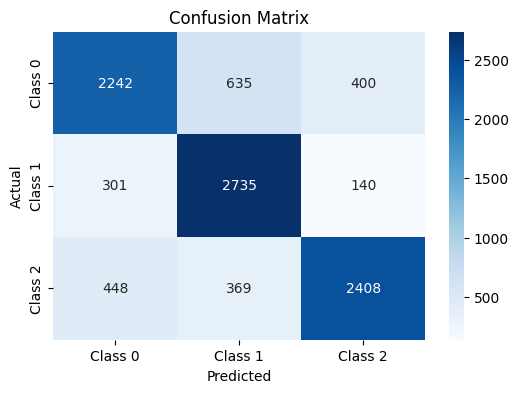

In [ ]:
#  Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



This confusion matrix evaluates a classification model that predicts three classes:

Class 0 (Functional wells)
Class 1 (Needs repair)
Class 2 (Non-functional wells)

Key Observations from the Confusion Matrix:
Diagonal values (True Positives - Correct Predictions)

2242 functional wells (Class 0) were correctly classified.
2735 wells needing repair (Class 1) were correctly classified.
2408 non-functional wells (Class 2) were correctly classified.

Higher numbers along the diagonal indicate the model is performing well.

## Model Evaluation

ROC AUC Score: 0.9115


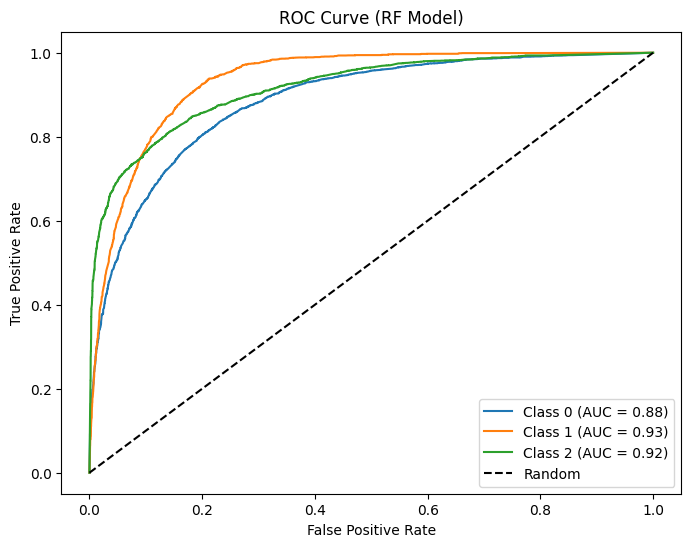

In [ ]:
# Get predicted probabilities for ROC AUC calculation
y_pred_proba = best_rf_model.predict_proba(X_val)

# Calculate ROC AUC score (multi-class)
roc_auc = roc_auc_score(y_val, y_pred_proba, multi_class='ovr')  # 'ovr' for one-vs-rest
print(f"ROC AUC Score: {roc_auc:.4f}")


# Plot ROC curve for each class
classes = [0, 1, 2]  # Assuming 3 classes
plt.figure(figsize=(8, 6))

for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_val == cls, y_pred_proba[:, cls])  # Get ROC curve values
    roc_auc_cls = auc(fpr, tpr)  # Calculate AUC for this class
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {roc_auc_cls:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (RF Model)')
plt.legend(loc="lower right")
plt.show()



The plot compares the performance of the model for three classes (Class 0, Class 1, and Class 2) and a random classifier.

Class 1 (Needs Repair) has the highest AUC (0.93), meaning the model is best at identifying wells needing repair.

Class 2 (Non-functional) also performs well (AUC = 0.92), showing strong classification ability.

Class 0 (Functional) has a slightly lower AUC (0.88), indicating slightly more misclassifications compared to the other two.

In summary, the model demonstrates strong performance in distinguishing between all three classes, with the best accuracy for Class 1.

ROC AUC Score: 0.9063


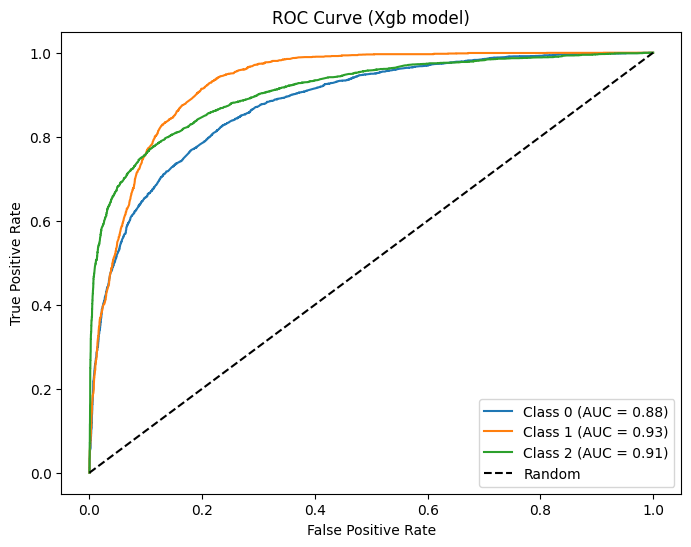

In [ ]:
# Get predicted probabilities for ROC AUC calculation
y_pred_proba =  best_xgb_model.predict_proba(X_val)

# Calculate ROC AUC score (multi-class)
roc_auc = roc_auc_score(y_val, y_pred_proba, multi_class='ovr')
print(f"ROC AUC Score: {roc_auc:.4f}")


# Plot ROC curve for each class
classes = [0, 1, 2]
plt.figure(figsize=(8, 6))

for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_val == cls, y_pred_proba[:, cls])
    roc_auc_cls = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {roc_auc_cls:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Xgb model)')
plt.legend(loc="lower right")
plt.show()



Class 1 (Needs Repair) achieves the best performance with an AUC of 0.93, showing the model's strength in identifying wells needing repair.

Class 2 (Non-functional) follows closely with an AUC of 0.92, demonstrating robust classification ability.

Class 0 (Functional) has a slightly lower AUC of 0.88, indicating comparatively more misclassifications.

In [ ]:
# Make predictions on the test dataset
test_predictions = ensemble_model.predict(test_data)

# Convert numerical predictions to actual class labels
label_mapping = {0: 'functional', 1: 'functional needs repair', 2: 'non functional'}
test_predictions = [label_mapping[pred] for pred in test_predictions]

# Prepare submission DataFrame using stored 'test_ids'
submission_df = pd.DataFrame({'id': test_ids, 'status_group': test_predictions})

# Save to CSV file
submission_df.to_csv("submission.csv", index=False)


Here we use the trained Ensemble model (ensemble_model) to predict the functionality of water wells in the test dataset (test_data). It converts the numerical predictions into user-friendly labels ('functional', 'functional needs repair', 'non functional') and creates a submission file ("submission.csv") containing the well IDs and their predicted statuses.

In [ ]:
submission_df.head()

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional needs repair
3,45559,non functional
4,49871,functional


Several models were trained and evaluated, including Decision Tree, Random Forest, XGBoost, CatBoost, KNN, and Gaussian Naive Bayes. Random Forest and XGBoost demonstrated the best performance. To address class imbalance, techniques such as downsampling and upsampling were implemented.

The final selected model, an ensemble of Random Forest and XGBoost, achieved an accuracy of 76%, showing promising results for predicting water well functionality in Tanzania. The model exhibited strong performance across different well status categories, especially for wells needing repair.

#Conclusion

In conclusion, this project successfully developed a predictive model for water well functionality in Tanzania. The model's accuracy and robust performance demonstrate its potential for positive impact in supporting sustainable water resource management

While this model provides a strong foundation, there's potential for further enhancement. Future work could involve
* Exploring additional data sources
* Incorporating more detailed geographic information
* Experimenting with alternative modeling techniques.

These efforts can further improve prediction accuracy and provide even greater insights into the factors influencing well functionality.